<a href="https://colab.research.google.com/github/LeVuPhuoc/AI-Robotics/blob/main/Robot_3dof.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  1.  Import thư viện

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import keras
import tensorflow as tf
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import Adam

# 2. Tạo data


In [4]:
from re import U
import matplotlib.pyplot as plt
import math
import csv
import numpy as np
u=[]
z=[]
for i in range(0,121,3):
  for j in range(0,91,3):
    for k in range (0,91,3):
      x=50*math.cos(math.radians(i))+40*math.cos(math.radians(i+j))+30*math.cos(math.radians(i+j+k))
      y=50*math.sin(math.radians(i))+40*math.sin(math.radians(i+j))+30*math.sin(math.radians(i+j+k))
      t=i+j+k
      z.append(np.array((i,j,k,x,y,t)))
  u.extend(z)

In [6]:
header = ['anpha', 'beta','delta', 'x', 'y','phi']
with open('robot_3dof.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(header)

    # write multiple rows
    writer.writerows(u)

# 4. Xử lý dữ liệu

In [7]:
data = pd.read_csv('robot_3dof.csv')
data.shape
numpy_dataset = data.values
y=numpy_dataset[:,:3]
x=numpy_dataset[:,3:]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)
print(x_train[0])
print(y_train[0])
print("Original data is:\n",x_train)
print("Shape of data is: ",x_train.shape)
print("Original data is:\n",y_train)
print("Shape of data is: ",y_train.shape)

[91.00908905 38.83306246 87.        ]
[ 3.  6. 78.]
Original data is:
 [[ 91.00908905  38.83306246  87.        ]
 [ 47.75638979  88.80716421 102.        ]
 [ 70.87241845  80.02151122  93.        ]
 ...
 [ 73.11974665  91.83411212  69.        ]
 [-13.32726188 101.09404995 156.        ]
 [-75.91517764  57.41227441 195.        ]]
Shape of data is:  (661936, 3)
Original data is:
 [[  3.   6.  78.]
 [ 24.  54.  24.]
 [ 24.  24.  45.]
 ...
 [ 39.  15.  15.]
 [ 81.   0.  75.]
 [102.  54.  39.]]
Shape of data is:  (661936, 3)


# 5. Train dữ liệu

In [8]:
model=Sequential()
model.add(Dense(128, activation='relu', input_shape = (3,))) 
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(3,  activation='linear'))
model.summary()
model.compile(loss='mse', optimizer =Adam(), metrics=['acc'])
history = model.fit(x_train, y_train, batch_size = 32, epochs = 50, validation_split = 0.2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               512       
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 3)                 51        
                                                                 
Total params: 11,427
Trainable params: 11,427
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
16549/16549 [============================

# 5. Kiểm tra kết quả

In [9]:
score=model.evaluate(x_test,y_test,verbose=0)
print('sai so kiem tra la',score[0])
print('do chinh xac kiem tra',score[1])

sai so kiem tra la 2.5627567768096924
do chinh xac kiem tra 0.9687766432762146


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


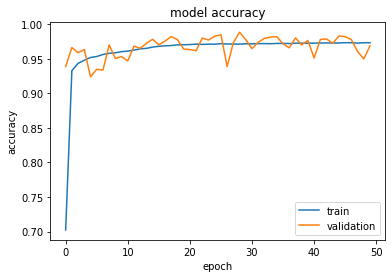

In [10]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper_left')
plt.show()

# 6.   kiểm tra lại

In [16]:
Px_test_train =   70
Py_test_train = 80
phi = 90
print(Px_test_train,Py_test_train,phi)
test = model.predict([[Px_test_train,Py_test_train,phi]])
t1 = test[0][0]
t2 = test[0][1]
t3 = test[0][2]

x_1=50*math.cos(math.radians(t1))+40*math.cos(math.radians(t1+t2))+30*math.cos(math.radians(t1+t2+t3))
y_1=50*math.sin(math.radians(t1))+40*math.sin(math.radians(t1+t2))+30*math.sin(math.radians(t1+t2+t3))
print('x = ',x_1,'y = ',y_1)
print(t1,t2,t3)

70 80 90
x =  69.5225800303444 y =  80.16100260009412
20.161385 35.24498 34.83006


In [18]:
model.save('Robot_3dof.h5')